In [1]:
import pandas as pd
import numpy as np
import glob
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
%matplotlib inline

#### Check out the data

In [2]:
# merging two csv files 
# student_data = pd.read_csv('combined_file.csv')
#student_data = pd.concat(map(pd.read_csv, ['student-mat.csv', 'student-por.csv']), ignore_index=True)

# Read the CSV files
df1 = pd.read_csv('student-mat.csv')
df2 = pd.read_csv('student-por.csv')

# Merge the two dataframes
student_data = pd.concat([df1, df2])

student_data.to_csv("combined.csv", index=False)

##### Understand the data

In [3]:
student_data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [4]:
student_data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [5]:
student_data.drop(columns=student_data.columns[0], axis=1,  inplace=True)

In [6]:
student_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1044 entries, 0 to 648
Data columns (total 32 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   sex         1044 non-null   object
 1   age         1044 non-null   int64 
 2   address     1044 non-null   object
 3   famsize     1044 non-null   object
 4   Pstatus     1044 non-null   object
 5   Medu        1044 non-null   int64 
 6   Fedu        1044 non-null   int64 
 7   Mjob        1044 non-null   object
 8   Fjob        1044 non-null   object
 9   reason      1044 non-null   object
 10  guardian    1044 non-null   object
 11  traveltime  1044 non-null   int64 
 12  studytime   1044 non-null   int64 
 13  failures    1044 non-null   int64 
 14  schoolsup   1044 non-null   object
 15  famsup      1044 non-null   object
 16  paid        1044 non-null   object
 17  activities  1044 non-null   object
 18  nursery     1044 non-null   object
 19  higher      1044 non-null   object
 20  internet    10

In [7]:
print(student_data.duplicated().sum())
student_data.drop_duplicates()
student_data.info()

0
<class 'pandas.core.frame.DataFrame'>
Index: 1044 entries, 0 to 648
Data columns (total 32 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   sex         1044 non-null   object
 1   age         1044 non-null   int64 
 2   address     1044 non-null   object
 3   famsize     1044 non-null   object
 4   Pstatus     1044 non-null   object
 5   Medu        1044 non-null   int64 
 6   Fedu        1044 non-null   int64 
 7   Mjob        1044 non-null   object
 8   Fjob        1044 non-null   object
 9   reason      1044 non-null   object
 10  guardian    1044 non-null   object
 11  traveltime  1044 non-null   int64 
 12  studytime   1044 non-null   int64 
 13  failures    1044 non-null   int64 
 14  schoolsup   1044 non-null   object
 15  famsup      1044 non-null   object
 16  paid        1044 non-null   object
 17  activities  1044 non-null   object
 18  nursery     1044 non-null   object
 19  higher      1044 non-null   object
 20  internet    

In [8]:
#sns.catplot(x="sex", y="studytime", data=student_data, kind="box", aspect=1.5)
#sns.catplot(x="paid", y="G1", data=student_data, kind="box", aspect=1.5)
#plt.show()

<Axes: >

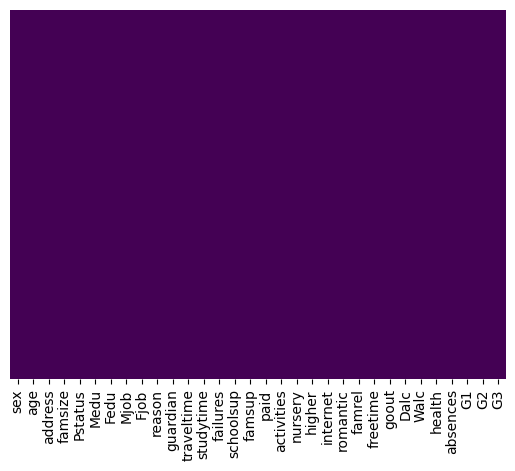

In [9]:
sns.heatmap(student_data.isnull(), yticklabels = False, cbar=False, cmap='viridis')

não ha missing values

### Outliers

In [10]:
student_data.nunique()

sex            2
age            8
address        2
famsize        2
Pstatus        2
Medu           5
Fedu           5
Mjob           5
Fjob           5
reason         4
guardian       3
traveltime     4
studytime      4
failures       4
schoolsup      2
famsup         2
paid           2
activities     2
nursery        2
higher         2
internet       2
romantic       2
famrel         5
freetime       5
goout          5
Dalc           5
Walc           5
health         5
absences      35
G1            18
G2            17
G3            19
dtype: int64

<Axes: ylabel='age'>

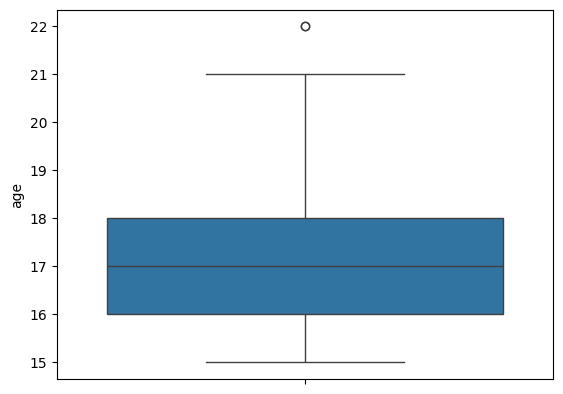

In [11]:
sns.boxplot(y=student_data['age'])# -> nao melhora remover os outliers de G1 e age!!


<Axes: ylabel='absences'>

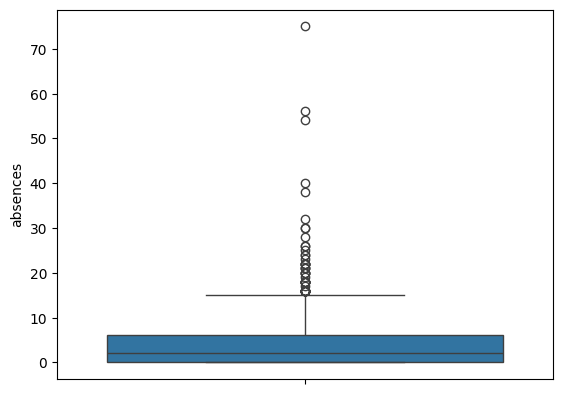

In [12]:
sns.boxplot(y=student_data['absences'])


In [13]:
# remove outliers from 'absences'
student_data = student_data[student_data['absences'] < 45]

#### new columns

In [14]:
'''
new column with the mean of 'walc' and 'dalc'
'''

#student_data['Malc'] = np.ceil(student_data[['Walc', 'Dalc']].mean(axis=1)).astype(int)
#student_data=student_data.drop(['Walc', 'Dalc'] , axis=1) 

# Assuming 'walc' and 'dalc' columns exist in student_data
student_data['Malc'] = (student_data['Dalc'] * 5 + student_data['Walc'] * 2) / 7

# If you want to round up to the nearest integer, you can use np.ceil
student_data['Malc'] = np.ceil(student_data['Malc']).astype(int)



new column 'media dos testes'

In [15]:
student_data['meanG'] = np.ceil(student_data[['G1', 'G2', 'G3']].mean(axis=1)).astype(int) 


In [16]:
student_data.head()

,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,...,goout,Dalc,Walc,health,absences,G1,G2,G3,Malc,meanG
0,F,18,U,GT3,A,4,4,at_home,teacher,course,...,4,1,1,3,6,5,6,6,1,6
1,F,17,U,GT3,T,1,1,at_home,other,course,...,3,1,1,3,4,5,5,6,1,6
2,F,15,U,LE3,T,1,1,at_home,other,other,...,2,2,3,3,10,7,8,10,3,9
3,F,15,U,GT3,T,4,2,health,services,home,...,2,1,1,5,2,15,14,15,1,15
4,F,16,U,GT3,T,3,3,other,other,home,...,2,1,2,5,4,6,10,10,2,9


### Correlation

In [17]:
df_corr = student_data
column_mapping = {
    'sex': {'F': 0, 'M': 1},
    'famsize': {'LE3': 0, 'GT3': 1},
    'Pstatus': {'A': 0, 'T': 1},
    'schoolsup': {'no': 0, 'yes': 1},
    'famsup': {'no': 0, 'yes': 1},
    'paid': {'no': 0, 'yes': 1},
    'activities': {'no': 0, 'yes': 1},
    'nursery': {'no': 0, 'yes': 1},
    'higher': {'no': 0, 'yes': 1},
    'internet': {'no': 0, 'yes': 1},
    'romantic': {'no': 0, 'yes': 1}
}
for column, mapping in column_mapping.items():
    df_corr[column] = df_corr[column].map(mapping)
# Drop columns
df_corr.drop(['address', 'Mjob', 'Fjob', 'reason', 'guardian'], axis=1, inplace=True)


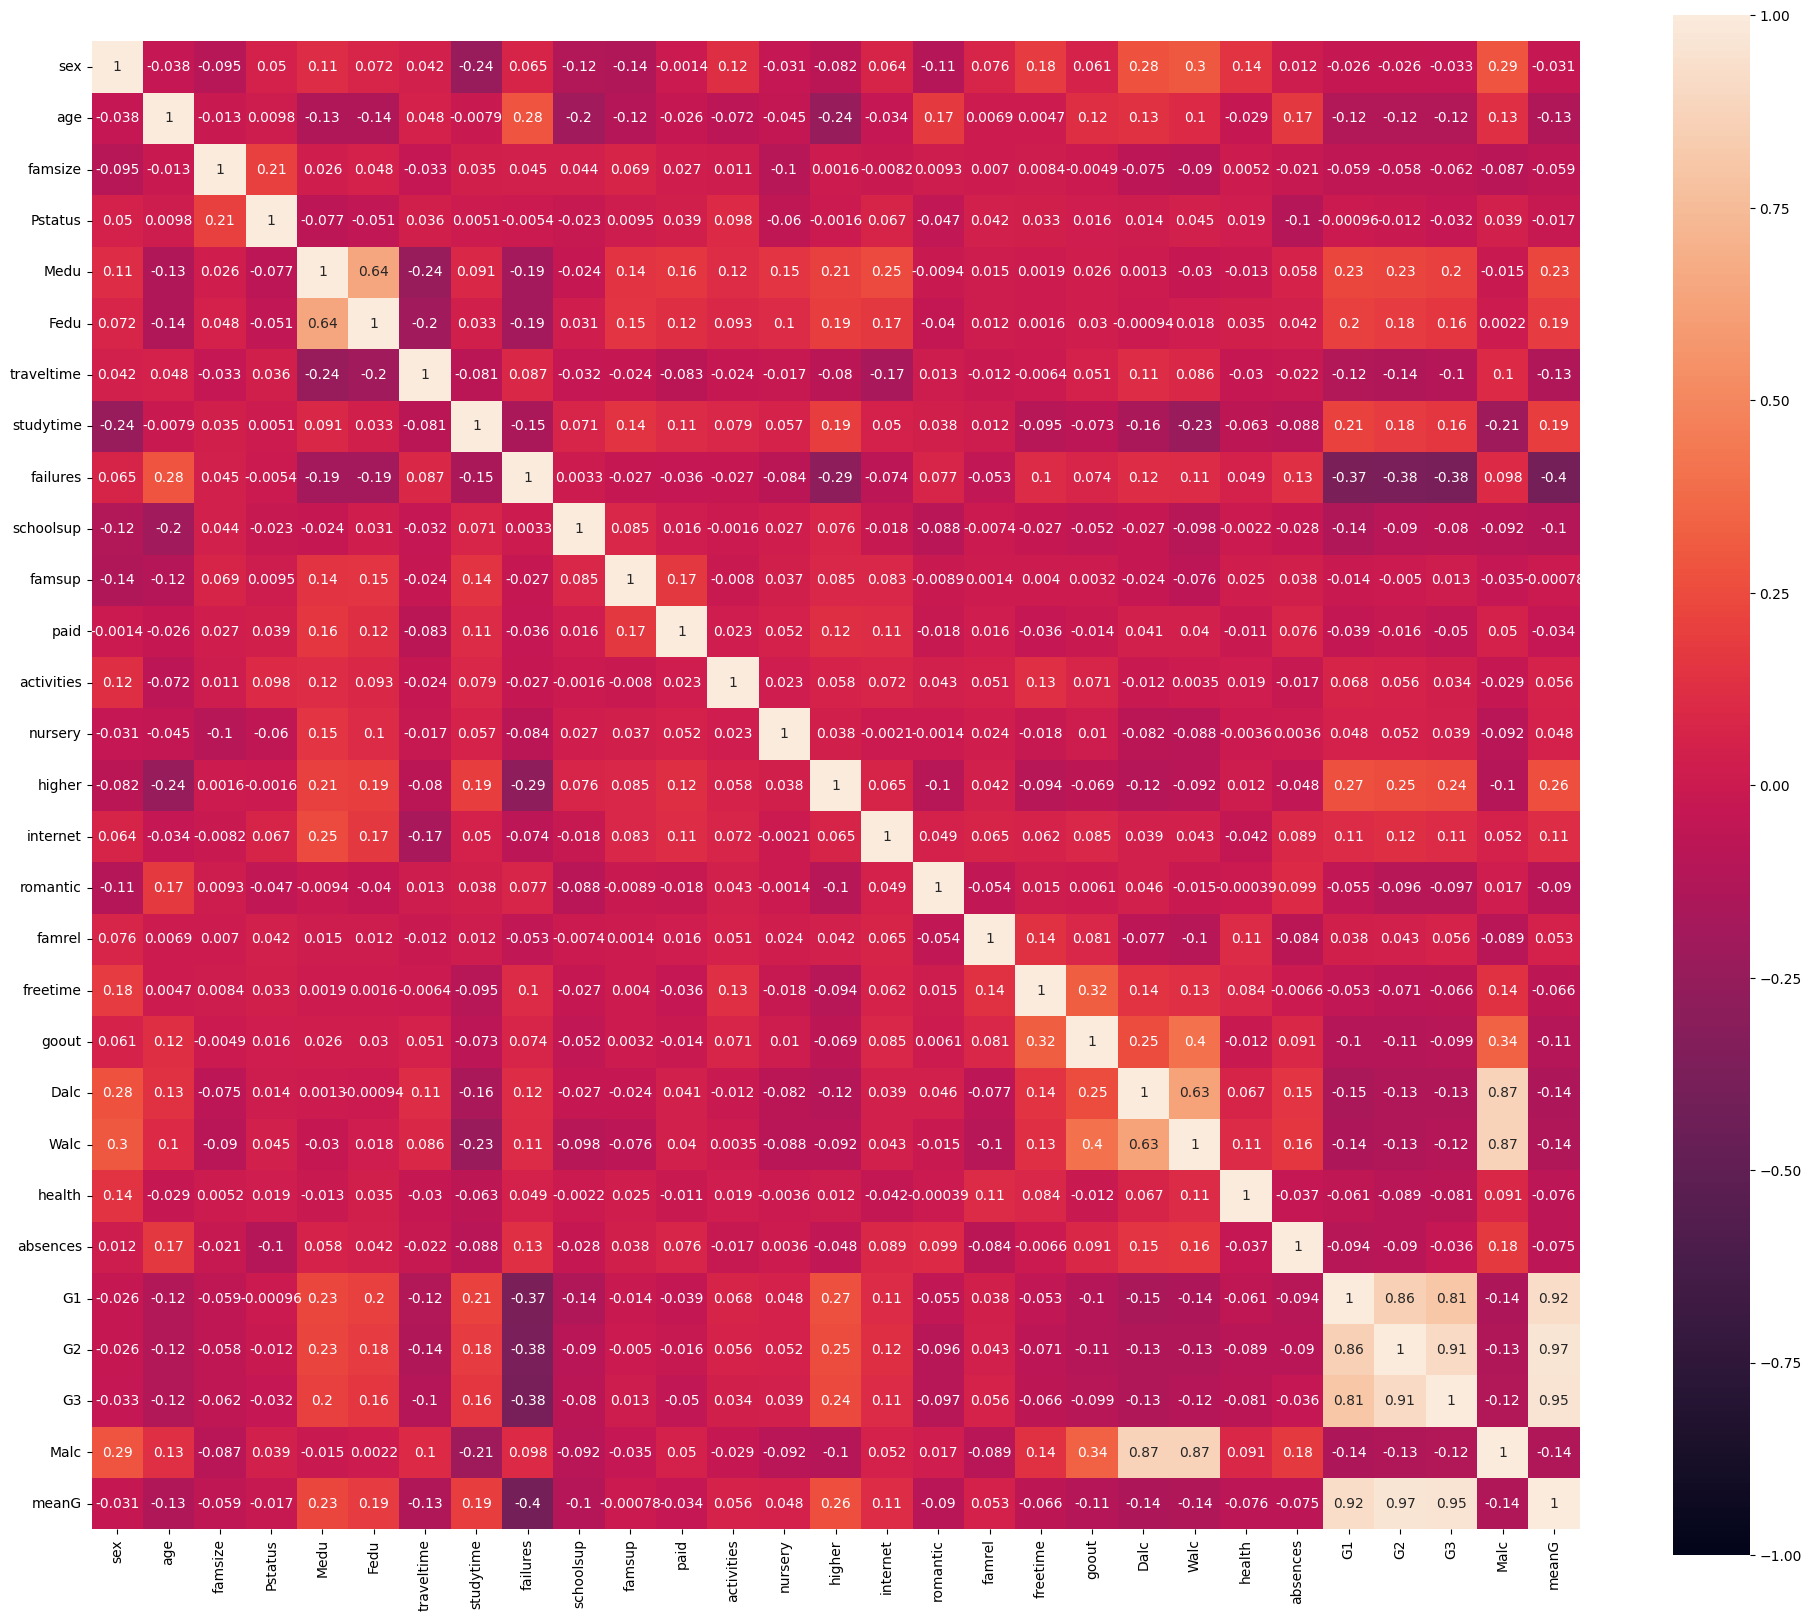

In [18]:
corr_matrix = df_corr.corr(numeric_only=True)
f,ax = plt.subplots(figsize=(24,20))
sns.heatmap(corr_matrix,vmin=-1,vmax=1, square = True, annot = True);

##### Top 10 correlations

In [19]:
top_corr = corr_matrix.unstack()
top_corr = top_corr[top_corr != 1]  
top_10_corr = top_corr['Malc'].nlargest(15)  # Get the top 10 correlations

print(top_10_corr)

Walc          0.874971
Dalc          0.868126
goout         0.337590
sex           0.287348
absences      0.176369
freetime      0.136714
age           0.130385
traveltime    0.101361
failures      0.098444
health        0.090772
internet      0.051887
paid          0.049764
Pstatus       0.039204
romantic      0.017375
Fedu          0.002156
dtype: float64


In [20]:
top_down_corr = corr_matrix.unstack()
top_down_10_corr = top_corr['Malc'].nsmallest(15)  # Get the 10 correlations

print(top_down_10_corr)

studytime    -0.206561
G1           -0.141415
meanG        -0.138140
G2           -0.131371
G3           -0.121751
higher       -0.101875
nursery      -0.092464
schoolsup    -0.091630
famrel       -0.088729
famsize      -0.086681
famsup       -0.035080
activities   -0.029270
Medu         -0.015057
Fedu          0.002156
romantic      0.017375
dtype: float64


who have higher grades in the first, second, and third periods are less likely to fail school

In [21]:
X = df_corr.drop(['meanG', 'famsup', 'sex', 'Pstatus','paid','famsize' ], axis=1)
y = df_corr['meanG'] # accuracy de 0.86

In [22]:
#X = df_corr.drop(['Malc', 'Fedu', 'Medu', 'romantic','activities','famsize', 'famsup' ], axis=1)
#y = df_corr['Malc'] accuracy de 0.99

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)


### Decision Tree

In [24]:
''' decision tree '''
clf = DecisionTreeClassifier(random_state=2021)

In [25]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=2021)

In [26]:
y_pred = clf.predict(X_test)

#### Confusion Matrix

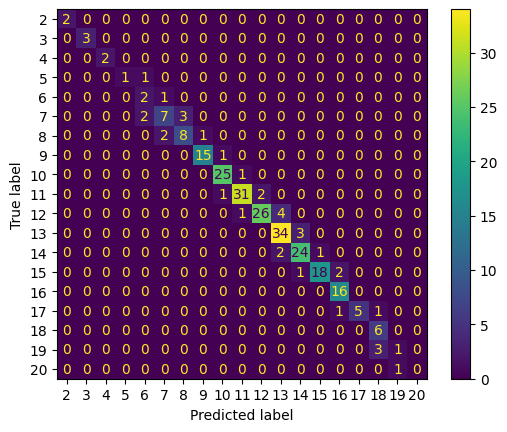

In [27]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred )
plt.show()

In [28]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00         2
           5       1.00      0.50      0.67         2
           6       0.40      0.67      0.50         3
           7       0.70      0.58      0.64        12
           8       0.73      0.73      0.73        11
           9       0.94      0.94      0.94        16
          10       0.93      0.96      0.94        26
          11       0.94      0.91      0.93        34
          12       0.93      0.84      0.88        31
          13       0.85      0.92      0.88        37
          14       0.86      0.89      0.87        27
          15       0.95      0.86      0.90        21
          16       0.84      1.00      0.91        16
          17       1.00      0.71      0.83         7
          18       0.60      1.00      0.75         6
          19       0.50    

/home/francisca/miniconda3/envs/daa/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/francisca/miniconda3/envs/daa/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/francisca/miniconda3/envs/daa/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le

In [29]:
accuracy = accuracy_score(y_test, y_pred)
print(f'accuracy: {accuracy:.2f}')

accuracy: 0.87


#### Linear Regression

In [30]:
from sklearn import linear_model

# Create linear regression object 
regr = linear_model.LinearRegression() 
   
# Train the model using the training sets 
regr.fit(X_train, y_train) 
   


LinearRegression()

In [31]:
y_pred = regr.predict(X_test)

In [32]:
from sklearn.metrics import mean_squared_error, r2_score
# The coefficients
print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Intercept: %.2f" % regr.intercept_)


Coefficients: 
 [ 0.00419032  0.00468357 -0.0004781  -0.03478505 -0.01955542 -0.0121948
  0.03913522 -0.00161851  0.00276179 -0.03656773 -0.0144392  -0.0074033
  0.01039835  0.0027556  -0.00074862  0.01399749 -0.0005755   0.00884479
 -0.00037325  0.33733679  0.34449689  0.31399081 -0.01356983]
Mean squared error: 0.08
Coefficient of determination: 0.99
Intercept: 0.37


intercept -> representa o valor da variavel dependente (meanG) quando todas as vars independentes sao zeros

r-squared value -> mede quao bem as variaveis indepedentes explicam a variedade da var depedente. (1 indica a perfect)

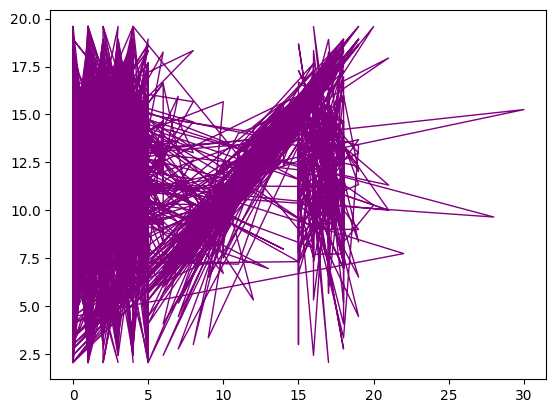

In [33]:
# Plot outputs 
plt.plot(X_test, regr.predict(X_test), color='purple',linewidth=1) 
plt.show()


#### GridSearchCV

In [125]:
from sklearn.model_selection import GridSearchCV

In [126]:
print(clf.get_depth())
print(clf.get_n_leaves())

8
16


In [127]:
param_grid_dt = {'criterion' : ['gini', 'entropy'], 'max_depth': [1,2,3,4,5,6,7]}
estimator_dt = DecisionTreeClassifier(random_state=2022)
grid_dt = GridSearchCV(estimator_dt, param_grid_dt, refit = True, verbose=2) # cv=10 -> folds

In [128]:
grid_dt.fit(X_train, y_train)

Fitting 5 folds for each of 14 candidates, totalling 70 fits
[CV] END ........................criterion=gini, max_depth=1; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=1; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=1; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=1; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=1; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=2; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=2; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=2; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=2; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=2; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=3; total time=   0.0s
[CV] END ........................criterion=gini,

GridSearchCV(estimator=DecisionTreeClassifier(random_state=2022),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7]},
             verbose=2)

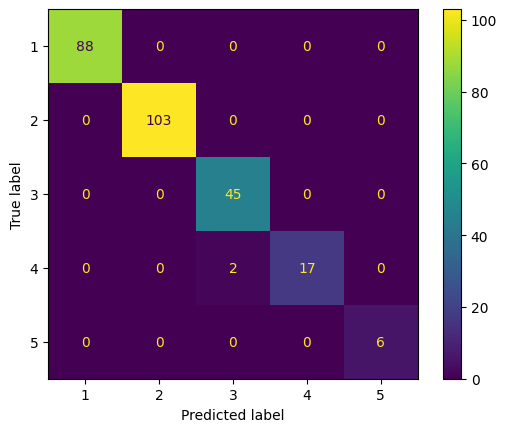

In [129]:
ConfusionMatrixDisplay.from_predictions(y_test, grid_dt.predict(X_test))
plt.show()

In [130]:
print(classification_report(y_test, grid_dt.predict(X_test)))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        88
           2       1.00      1.00      1.00       103
           3       0.96      1.00      0.98        45
           4       1.00      0.89      0.94        19
           5       1.00      1.00      1.00         6

    accuracy                           0.99       261
   macro avg       0.99      0.98      0.98       261
weighted avg       0.99      0.99      0.99       261



Com a abordagem GridSearchCV a nossa accuracy melhorou para 0.82

#### Decision Tree Pruning

In [217]:
print(clf.get_depth())
print(clf.get_n_leaves())

12
120


In [218]:
max_depth = clf.get_depth()

In [219]:
param_grid = {'max_depth' : [max_depth for max_depth in range(1,max_depth+1)]}
estimator = DecisionTreeClassifier(random_state=42)
max_depth_grid_search = GridSearchCV(estimator,param_grid)

max_depth_grid_search.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]})

In [220]:
max_depth_grid_search.best_params_

{'max_depth': 9}

In [221]:
max_depth_tree = max_depth_grid_search.best_estimator_
print(max_depth_tree)

DecisionTreeClassifier(max_depth=9, random_state=42)


In [222]:
best_max_depth = max_depth_tree.get_depth()
print(best_max_depth)

9


In [223]:
print(classification_report(y_test, max_depth_tree.predict(X_test)))

              precision    recall  f1-score   support

           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         4
           4       1.00      1.00      1.00         2
           5       0.20      0.50      0.29         2
           6       0.57      0.67      0.62         6
           7       0.89      0.50      0.64        16
           8       0.56      0.67      0.61        15
           9       0.73      0.80      0.76        20
          10       0.92      0.89      0.90        37
          11       0.88      0.88      0.88        33
          12       0.88      0.96      0.92        24
          13       0.96      0.87      0.92        31
          14       0.85      0.85      0.85        20
          15       0.86      0.80      0.83        15
          16       0.95      0.95      0.95        20
          17       0.83      1.00      0.91         5
          18       1.00      1.00      1.00         9
          19       0.00    

/home/francisca/miniconda3/envs/daa/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/francisca/miniconda3/envs/daa/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/francisca/miniconda3/envs/daa/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result

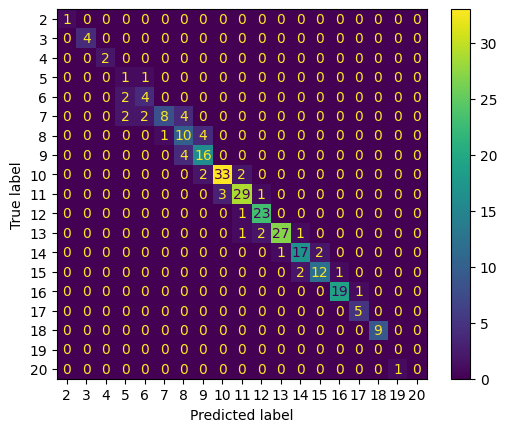

In [224]:
ConfusionMatrixDisplay.from_predictions(y_test, max_depth_grid_search.predict(X_test))
plt.show()

### Random Forest

In [228]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

# Generate synthetic data
X, y = make_regression(n_features=4, n_informative=2, random_state=0, shuffle=False)

# Create and fit the RandomForestRegressor
rfr = RandomForestRegressor(max_depth=6)
rfr.fit(X, y)

# Reshape the input for prediction
input_data = np.array([0, 0, 0, 0]).reshape(1, -1)

# Make the prediction
prediction = rfr.predict(input_data)
print(prediction)

[1.87465238]


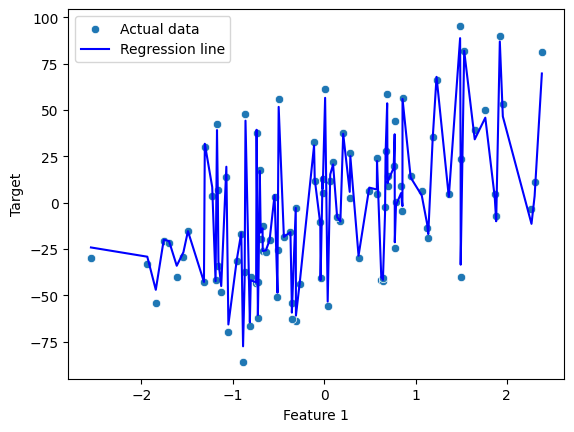

In [230]:
sns.scatterplot(x=X[:, 0], y=y, label='Actual data')
sns.lineplot(x=X[:, 0], y=rfr.predict(X), color='blue', label='Regression line')
plt.xlabel('Feature 1')
plt.ylabel('Target')
plt.legend()
plt.show()

In [232]:
from sklearn.metrics import mean_absolute_error, r2_score

# Assuming you have a test set (X_test, y_test)
y_pred = rfr.predict(X)  # Assuming X is your training data

# Calculate Mean Absolute Error
mae = mean_absolute_error(y, y_pred)
print(f'Mean Absolute Error: {mae}')

# Calculate R-squared
r2 = r2_score(y, y_pred)
print(f'R-squared: {r2}')

Mean Absolute Error: 2.5918397490394214
R-squared: 0.9921831636803513


Accuracy-like Metric: 0.1
